In [1]:
import sys
sys.path.append("/home/bl9/gempy/")
import gempy as gp

%matplotlib inline
import pymc
import numpy as np
import math

#import geobayes_simple as gs
from IPython.core.display import Image

from pymc.Matplot import plot
from pymc import graph

from IPython.core.pylabtools import figsize
figsize(15, 6)

#import seaborn
#seaborn.set_context(font_scale=2)
#seaborn.set_style("white")

import scipy.optimize as sop
import scipy.stats as stats
from scipy.signal import argrelextrema

import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

import importlib

import copy

/home/bl9/gempy/gempy/Visualization.py:15: UserWarning: Vtk package is not installed. No vtk visualization available.
  warnings.warn('Vtk package is not installed. No vtk visualization available.')


In [2]:
#import vtk

In [3]:
#gp.plot_data_3D(geo_data)

In [4]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 50,50,50],
                         path_f = "/home/bl9/gempy//input_data/FabLessPoints_Foliations.csv",
                         path_i = "/home/bl9/gempy//input_data/FabLessPoints_Points.csv")
geo_data.n_faults = 1

In [5]:
gp.set_series(geo_data, {"fault":'MainFault', 
                      "Rest":('Reservoir', 'Seal', 'NonReservoirDeep','SecondaryReservoir')},
                       order_series = ["fault",
                                       "Rest",
                                       ], verbose=0)

In [17]:
geo_data.set_formation_number(['MainFault', 'NonReservoirDeep', 'Reservoir', 'Seal',
                               'SecondaryReservoir'])

In [18]:
gp.data_to_pickle(geo_data, 'BasicFault')

In [19]:
# stdev for x,y,z interface coordinates
geo_data.interfaces['X_std'] = None
geo_data.interfaces['Y_std'] = None
geo_data.interfaces['Z_std'] = None
geo_data.interfaces['dist_type'] = "Normal" # should be initially None
geo_data.interfaces['X_dist'] = None
geo_data.interfaces['Y_dist'] = None
geo_data.interfaces['Z_dist'] = None

In [20]:
geo_data.interfaces.head()

,X,Y,Z,formation,series,order_series,formation number,isFault,X_std,Y_std,Z_std,dist_type,X_dist,Y_dist,Z_dist
0,1000.0,1000.0,-1000.0,MainFault,fault,1,1,True,None,None,None,Normal,None,None,None
1,800.0,1000.0,-1600.0,MainFault,fault,1,1,True,None,None,None,Normal,None,None,None
2,1200.0,1000.0,-400.0,MainFault,fault,1,1,True,None,None,None,Normal,None,None,None
3,1100.0,1000.0,-700.0,MainFault,fault,1,1,True,None,None,None,Normal,None,None,None
4,900.0,1000.0,-1300.0,MainFault,fault,1,1,True,None,None,None,Normal,None,None,None


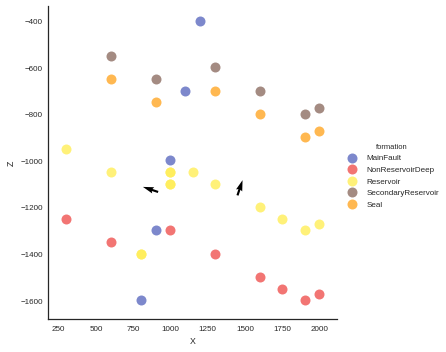

In [146]:
gp.plot_data(geo_data)

In [135]:
interp_data = gp.InterpolatorInput(geo_data, 
                                   u_grade = [3, 3],
                                   compile_theano=True)

[2, 2]


In [305]:
sol, pot = gp.compute_model(interp_data, get_potential_at_interfaces=True)
sol.shape

[3, 3]


(3, 125000)

In [410]:
res_surf, what_surf = gp.get_surfaces(potential_block=sol[1,:], interp_data = interp_data, n_formation = (interp_data.get_formation_number()['Reservoir']))

lith = sol[0,:]
fault = sol[2,:]

In [ ]:
np.set_printoptions(threshold=10)
print(res_surf[:,1]

In [215]:
interp_data.get_formation_number()

{'DefaultBasement': 0,
 'MainFault': 1,
 'NonReservoirDeep': 2,
 'Reservoir': 3,
 'Seal': 4,
 'SecondaryReservoir': 5}

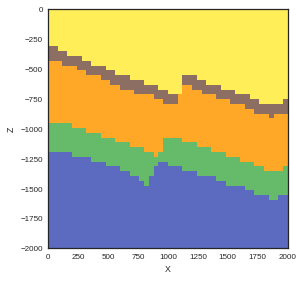

In [299]:
gp.plot_section(geo_data, sol[0,:], 25) #plot_data=True)

In [127]:
interp_data.geo_data_res.n_faults

1

In [97]:
interp_data.geo_data_res.interfaces

,X,Y,Z,formation,series,order_series,formation number,isFault,X_std,Y_std,Z_std,dist_type,X_dist,Y_dist,Z_dist
0,0.461638,0.5001,0.5001,MainFault,fault,1,1,True,NaN,NaN,NaN,Normal,None,None,None
1,0.410356,0.5001,0.346254,MainFault,fault,1,1,True,NaN,NaN,NaN,Normal,None,None,None
2,0.512921,0.5001,0.653946,MainFault,fault,1,1,True,NaN,NaN,NaN,Normal,None,None,None
3,0.487279,0.5001,0.577023,MainFault,fault,1,1,True,NaN,NaN,NaN,Normal,None,None,None
4,0.435997,0.5001,0.423177,MainFault,fault,1,1,True,NaN,NaN,NaN,Normal,None,None,None
5,0.282151,0.5001,0.435997,NonReservoirDeep,Rest,2,2,False,NaN,NaN,NaN,Normal,None,None,None
6,0.718049,0.5001,0.352664,NonReservoirDeep,Rest,2,2,False,NaN,NaN,NaN,Normal,None,None,None
7,0.538562,0.5001,0.397536,NonReservoirDeep,Rest,2,2,False,NaN,NaN,NaN,Normal,None,None,None
8,0.615485,0.5001,0.371895,NonReservoirDeep,Rest,2,2,False,NaN,NaN,NaN,Normal,None,None,None
9,0.653946,0.5001,0.359074,NonReservoirDeep,Rest,2,2,False,NaN,NaN,NaN,Normal,None,None,None


In [379]:
resolution = 50
model_size = 2000
scale_factor = (model_size/resolution) #original grid in [m]/grid resolution --> what if model not cubic?

()


In [445]:
# Finding spill and leak point

def spill_point(res_surface):
    mini = argrelextrema(res_surface[:,2], np.less, order=10)
    minima = np.array(list(zip(np.take(res_surface[:,1], mini[0]), np.take(res_surface[:,0], mini[0]), np.take(res_surface[:,2], mini[0]))))
    fault_thresh = minima[:,1] > 18 #taking only relevant side by setting a threshold visually estimated, best: 20
    min_corr_side = minima[fault_thresh]
    spill_pos = np.array(np.argmax(min_corr_side[:,2]))
    spill_z = np.take(min_corr_side[:,2], spill_pos)
    spill_point = np.array([np.take(min_corr_side[:,1], spill_pos), np.take(min_corr_side[:,0], spill_pos), np.take(min_corr_side[:,2], spill_pos)])
    return(spill_z)

def leak_point(res_surface):
    counter = 0
    #creating empty lists and arrays to save values
    xvals = []
    yvals = []
    zvals = []
    leak_min = np.empty([3,], dtype=int)
    
    while counter < 2000:
        #print(counter)
        for e in res_surface:
            #going along y-axis, appending x,y,z-values into lists
            if int(e[1]) == counter:
                xvals.append(e[0])
                yvals.append(e[1])
                zvals.append(e[2])
            #else:
            #    counter += 1
            #    continue
                
        if not zvals:
            counter += 1
            continue
                
        #saving x,y,z-values as lists/arrays      
        zvals = np.array(zvals)
        yvals = np.array(yvals)
        xvals = np.array(xvals)
        #print('x',xvals)
        #print('y',yvals)
        #print('z',zvals)
        
        #looking fore minima positions in z-array
        min_pos = argrelextrema(zvals, np.less, order=10)
        
        #saving x,y,z-positions of minima
        ypos = yvals[min_pos]
        xpos = xvals[min_pos]
        mins = zvals[min_pos]
        
        #
        np.append(leak_min, mins)
        mins_pos = np.array(list(zip(xpos, ypos, mins)))
        
        #maxmin_pos = np.argmax(mins)
        
        #axmin = (mins_pos[maxmin_pos,:])
        
        print('LEAK MIN', leak_min)
        print('MINS POS', mins_pos)
        leak_min = np.vstack((leak_min, mins_pos))
        #print('LEAK MIN2', leak_min)

        #empty lists for next iteration
        xvals = []
        yvals = []
        zvals = []
    
        counter += 1
        
    leak_min = np.delete(leak_min, 0, 0)
    
    near_fault_thresh = leak_min[:,0] < 30 #taking only relevant side by setting a threshold visually estimated, best: 20
    leak_line = leak_min[near_fault_thresh]
    
    leak_pos = np.array(np.argmax(leak_line[:,2]))
    leak_z = np.take(leak_line[:,2], leak_pos)

    leak_p = np.array([np.take(leak_line[:,1], leak_pos), np.take(leak_line[:,0], leak_pos), np.take(leak_line[:,2], leak_pos)])
    
    return(leak_z)

# Calculation of maximal reservoir volume
def max_res_vol(lith, fault, res_surface):
    #calculate spill point
    spill_z = spill_point(res_surface)
    #calculate leak point
    leak_z = leak_point(res_surface)
    
    #check for "down-to" z horizon, maximum depth of reservoir
    max_z = np.max([spill_z, leak_z])
    
    if max_z == spill_z:
        print("Down to spill.")
    else:
        print("Down to leak.")
    
    print('Max_Z:', max_z)
    
    res_nr = lith == 5#interp_data.get_formation_number()['Reservoir']
    mask = np.ones_like(lith)
    mask = mask.reshape(50,50,50)
    mask[:,:,:max_z] = False
    mask = mask.reshape(125000,)
    mask[~res_nr] = False
    mask[fault.astype(bool)] = False
    
    
    
    #counting reservoir cells
    vol_cells = 0
    
    for i in range(lith.shape[0]):
        if mask[i] == True:
            lith[i] = -1
            vol_cells +=1          
    
    #calulate volume from cells
    res_vol = ((scale_factor)**3) * vol_cells
    
    #return the maximum reservoir volume
    return(res_vol)

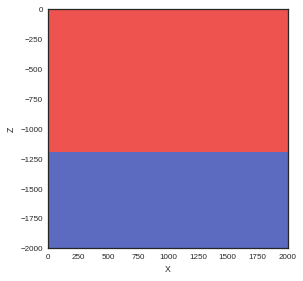

In [337]:
np.set_printoptions(threshold=10)
#max_z = 20 
def trap_bottom(lith, max_z):
    lith_reshape = lith.reshape(50,50,50)
    lith_reshape[:,:,max_z:] = True # above spill/leak
    lith_reshape[:,:,:max_z] = False # below spill/leak
    above = lith.reshape(125000,)
    return above

sol[0,:] = trap_bottom(sol[0,:], max_z)
gp.plot_section(geo_data, sol[0,:], 25) #plot_data=True)

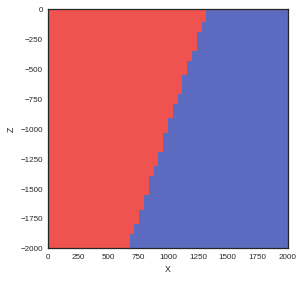

In [266]:
def footwall(fault):
    return fault.astype(bool)

sol[0,:] = trap_bottom(lith, max_z)
sol[0,:] = footwall(sol[2,:])
gp.plot_section(geo_data, sol[0,:], 25) #plot_data=True)

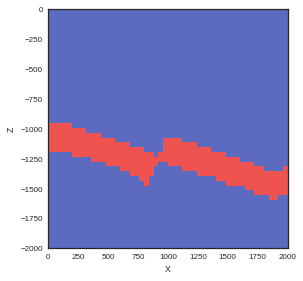

In [314]:
def trap_res(lith):
    res_nr = lith == 5 #interp_data.get_formation_number()['Reservoir']
    lith[res_nr] = True
    lith[~res_nr] = False
    below = lith
    return below
    
#sol[0,:] = trap_bottom(lith, max_z)
#sol[0,:] = footwall(fault)
sol_copy = copy.copy(sol[0,:])
sol_copy = trap_res(sol_copy)
gp.plot_section(geo_data, sol_copy, 25) #plot_data=True)

In [251]:
trapp = copy.copy(sol[0,:])

def trap(lith, fault, max_z):
    trap = trap_bottom(lith, max_z)
    return trap
#foot = footwall(fault) == True
#trap[fault.astype(bool)] = True
trapp(sol[0,:], fault, 10)
gp.plot_section(geo_data, trapp, 25) #plot_data=True)

TypeError: 'numpy.ndarray' object is not callable

In [273]:
res_nr = lith == interp_data.get_formation_number()['Reservoir']
res_nr

array([False, False, False, ..., False, False, False], dtype=bool)

In [33]:
res_z = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Reservoir']['Z']
res_len = len(interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Reservoir']['Z'])

In [278]:
z_res_top = pymc.Normal('z_unc_res', 0, 1./0.001)

In [54]:
#interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'] = np.arange(14)

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [446]:
  
@pymc.deterministic
def gempy_model(value=0, z_res_top = z_res_top):

    new_z = res_z + z_res_top
    print('variation:', z_res_top)
    #print('new', new_z)
    #print(res_z)
    interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'] = new_z
    #print(interp_data.geo_data_res.interfaces['Z'][interp_data.geo_data_res.interfaces['formation'] == 'Reservoir'])
    
    sol, pot = gp.compute_model(interp_data, get_potential_at_interfaces=True)
    #gp.plot_section(geo_data, sol[0,:], 25)
    
    res_surf, what_surf = gp.get_surfaces(potential_block=sol[1,:], 
                                          interp_data = interp_data, n_formation = (interp_data.get_formation_number()['Reservoir']),
)
    
    print(sol[1,:])
    lith_block = sol[0,:]
    fault_block = sol[2,:]
    
    print('Spill_Z:', spill_point(res_surf))
    print('Leak_Z:', leak_point(res_surf))
    
    print("Maximum reservoir volume: %s m³" % max_res_vol(lith_block, fault_block, res_surf))
    return sol

variation: -0.012041293633072724

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':



[3, 3]
[ 0.17406183  0.17888507  0.18372639 ...,  0.48413604  0.48968101
  0.49512422]
Spill_Z: -1101.44721985
LEAK MIN [ 4630826316843712511                    0 -4570813005306003456]
MINS POS [[  800.             0.         -1485.06084442]
 [ 1600.             0.         -1233.95645142]]
LEAK MIN [[  4.63082632e+18   0.00000000e+00  -4.57081301e+18]
 [  8.00000000e+02   0.00000000e+00  -1.48506084e+03]
 [  1.60000000e+03   0.00000000e+00  -1.23395645e+03]]
MINS POS []


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
iterations = 5

In [ ]:
model = pymc.Model([gempy_model, z_res_top])

In [ ]:
M = pymc.MCMC(model)
M.sample(iter=iterations)

In [ ]:
bla = M.trace('z_unc_res')[:]
bli = M.trace('gempy_model')[:]
bla.shape

for j in range(iterations):
    plt.figure()
    plt.title('Change in res_top: %s' % bla[j])
    print(bla[j])
    gp.plot_section(geo_data, bli[j,0], 25)

In [66]:
interp_data.geo_data_res.interfaces

,X,Y,Z,formation,series,order_series,formation number,isFault,X_std,Y_std,Z_std,dist_type,X_dist,Y_dist,Z_dist
0,0.461638,0.5001,0.5001,MainFault,fault,1,1,True,NaN,NaN,NaN,Normal,None,None,None
1,0.410356,0.5001,0.346254,MainFault,fault,1,1,True,NaN,NaN,NaN,Normal,None,None,None
2,0.512921,0.5001,0.653946,MainFault,fault,1,1,True,NaN,NaN,NaN,Normal,None,None,None
3,0.487279,0.5001,0.577023,MainFault,fault,1,1,True,NaN,NaN,NaN,Normal,None,None,None
4,0.435997,0.5001,0.423177,MainFault,fault,1,1,True,NaN,NaN,NaN,Normal,None,None,None
5,0.282151,0.5001,0.435997,NonReservoirDeep,Rest,2,2,False,NaN,NaN,NaN,Normal,None,None,None
6,0.718049,0.5001,0.352664,NonReservoirDeep,Rest,2,2,False,NaN,NaN,NaN,Normal,None,None,None
7,0.538562,0.5001,0.397536,NonReservoirDeep,Rest,2,2,False,NaN,NaN,NaN,Normal,None,None,None
8,0.615485,0.5001,0.371895,NonReservoirDeep,Rest,2,2,False,NaN,NaN,NaN,Normal,None,None,None
9,0.653946,0.5001,0.359074,NonReservoirDeep,Rest,2,2,False,NaN,NaN,NaN,Normal,None,None,None
